In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("covid19_articles.csv")

In [4]:
df = df.drop(columns = "Unnamed: 0")

In [5]:
df.shape

(52341, 7)

In [6]:
df.head()

,title,date,author,domain,url,content,topic_area
0,"China pneumonia outbreak: It's not SARS, so wh...",2020-01-06,"Nectar Gan, CNN",cnn,https://www.cnn.com/2020/01/06/health/china-pn...,(CNN) Chinese health authorities have not been...,general
1,New virus identified as likely cause of myster...,2020-01-08,nature,nature,https://www.nature.com/articles/d41586-020-000...,Passengers arriving at Hong Kong's internation...,science
2,China pneumonia outbreak may be caused by Sars...,2020-01-08,Reuters,theguardian,https://www.theguardian.com/science/2020/jan/0...,A cluster of more than 50 pneumonia cases in t...,general
3,"New SARS related virus, Wuhan pneumonia, ideni...",2020-01-09,"Nectar Gan, CNN",cnn,https://www.cnn.com/2020/01/08/health/china-wu...,(CNN) A mysterious pneumonia outbreak that has...,general
4,China's Sars-like illness worries health exper...,2020-01-09,https://www.theguardian.com/profile/sarahboseley,theguardian,https://www.theguardian.com/world/2020/jan/09/...,The finding that the outbreak of viral pneumon...,general


In [7]:
df[df['domain']=='cnn'].shape

(4766, 7)

In [8]:
df['title'].values[3:5]

array(["New SARS related virus, Wuhan pneumonia, idenitified in China's mysterious pneumonia outbreak - CNN",
       "China's Sars-like illness worries health experts | World news | The Guardian"],
      dtype=object)

In [9]:
titles = df['title'].values

In [10]:
df['title'].values[4].split('|', 1)[0]

"China's Sars-like illness worries health experts "

In [11]:
df['title'].values[3].split('|', 1)[0]

"New SARS related virus, Wuhan pneumonia, idenitified in China's mysterious pneumonia outbreak - CNN"

#### Remove punctuations in each title

In [12]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
all_titles = [i.split('|', 1)[0] for i in titles]

In [14]:
all_titles = [''.join([c for c in i if c not in punctuation]) for i in all_titles]

In [15]:
all_titles = [i.lower() for i in all_titles]

In [16]:
all_titles[3:5]

['new sars related virus wuhan pneumonia idenitified in chinas mysterious pneumonia outbreak  cnn',
 'chinas sarslike illness worries health experts ']

In [17]:
all_one_titles = " ".join(all_titles)

#### Remove stopwords and domain names

In [18]:
titles_tokens = all_one_titles.split()

In [19]:
domain_names = list(set(df['domain'].values))


In [20]:
clean_tokens = list()
sw = stopwords.words('english')
other_trash = ["news", "new", 'update', 'cnnpolitics', 'could', 'may']
trash_tokens = sw + domain_names + other_trash
for token in titles_tokens:
    if token not in trash_tokens:
        clean_tokens.append(token)

In [21]:
freq = nltk.FreqDist(clean_tokens)
freq

FreqDist({'coronavirus': 23465, 'us': 3597, 'covid19': 3462, 'uk': 2409, 'says': 2256, 'virus': 1983, 'amid': 1950, 'pandemic': 1750, 'china': 1710, 'lockdown': 1661, ...})

In [22]:
freq_dict = {} 
test_values = list(freq.values())
for key in list(freq.keys()): 
    for value in test_values: 
        freq_dict[key] = value 
        test_values.remove(value) 
        break  

In [23]:
from collections import Counter

In [24]:
plot_dict = dict(Counter(freq_dict).most_common(30))
dict(Counter(freq_dict).most_common(30))

{'coronavirus': 23465,
 'us': 3597,
 'covid19': 3462,
 'uk': 2409,
 'says': 2256,
 'virus': 1983,
 'amid': 1950,
 'pandemic': 1750,
 'china': 1710,
 'lockdown': 1661,
 'crisis': 1620,
 'trump': 1604,
 'oil': 1481,
 'outbreak': 1457,
 'cases': 1207,
 '2020': 1193,
 'fears': 1132,
 'health': 1073,
 'home': 1057,
 'due': 970,
 'global': 965,
 'stocks': 946,
 'help': 938,
 'man': 925,
 'market': 908,
 'first': 823,
 'latest': 815,
 'announces': 813,
 'hit': 753,
 'death': 744}

In [25]:
from matplotlib.pyplot import figure

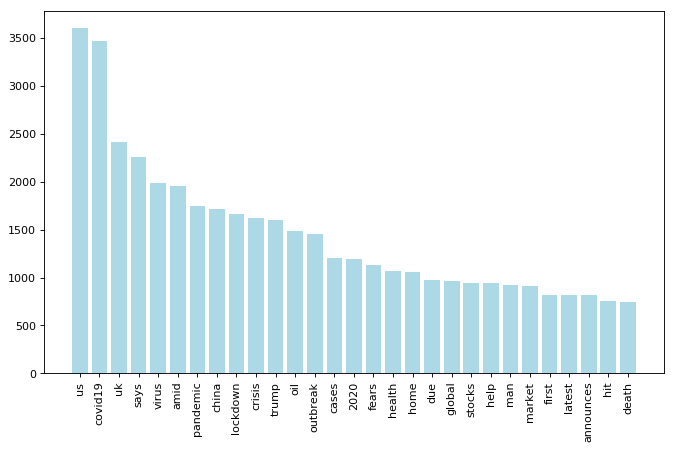

In [26]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(plot_dict.keys())[1:], list(plot_dict.values())[1:], color='lightblue')
plt.xticks(rotation=90)
plt.show()

#### see the trend in a rolling time window

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
import datetime
from datetime import timedelta 

In [29]:
d1 = datetime.datetime(2020, 1, 8) + timedelta(days=14) 
time_points = [d1]
d_temp = d1
for i in range(7):
    d_temp = d_temp + timedelta(days = 14)
    time_points.append(d_temp)
time_points

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 19, 0, 0),
 datetime.datetime(2020, 3, 4, 0, 0),
 datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 4, 1, 0, 0),
 datetime.datetime(2020, 4, 15, 0, 0),
 datetime.datetime(2020, 4, 29, 0, 0)]

In [30]:
time_points_index = [0]
for i in time_points[:7]:
    time_points_index.append(df[df['date']==i].index[0])
time_points_index.append(df.shape[0])
time_points_index

[0, 83, 1676, 3860, 7445, 17728, 35003, 47692, 52341]

In [31]:
china_count = []
china_percentage = []
for i in range(7):
    ls_temp = all_titles[time_points_index[i]:time_points_index[i+1]]
    count_temp = sum(['china' in i for i in ls_temp])
    china_count.append(count_temp)
    china_percentage.append(count_temp/(time_points_index[i+1] - time_points_index[i]))

In [32]:
fear_count = []
fear_percentage = []
for i in range(7):
    ls_temp = all_titles[time_points_index[i]:time_points_index[i+1]]
    count_temp = sum(['fear' in i for i in ls_temp])
    fear_count.append(count_temp)
    fear_percentage.append(count_temp/(time_points_index[i+1] - time_points_index[i]))

In [33]:
top_tokens = [Counter(freq_dict).most_common(30)[i][0] for i in range(0, 15)]

In [34]:
[Counter(freq_dict).most_common(30)[i][0] for i in range(1, 30)]

['us',
 'covid19',
 'uk',
 'says',
 'virus',
 'amid',
 'pandemic',
 'china',
 'lockdown',
 'crisis',
 'trump',
 'oil',
 'outbreak',
 'cases',
 '2020',
 'fears',
 'health',
 'home',
 'due',
 'global',
 'stocks',
 'help',
 'man',
 'market',
 'first',
 'latest',
 'announces',
 'hit',
 'death']

In [35]:
df_token_trend = pd.DataFrame({'date':['01-08 ~ 01-21', '01-22 ~ 02-05', '02-06 ~ 02-19', '02-20 ~ 03-04', 
                      '03-05 ~ 03-18', '03-19 ~ 04-01', '04-02 ~ 04-15', '04-16 ~ 04-21']})
for t in top_tokens:
    token_count = []
    token_percentage = []
    for i in range(8):
        ls_temp = all_titles[time_points_index[i]:time_points_index[i+1]]
        count_temp = sum([t in j for j in ls_temp])
        token_count.append(count_temp)
        token_percentage.append(count_temp/(time_points_index[i+1] - time_points_index[i]))
    df_token_trend[t] = token_percentage

In [36]:
df_token_trend

,date,coronavirus,us,covid19,uk,says,virus,amid,pandemic,china,lockdown,crisis,trump,oil,outbreak,cases
0,01-08 ~ 01-21,0.590361,0.795181,0.012048,0.000000,0.108434,0.795181,0.048193,0.024096,0.481928,0.000000,0.012048,0.012048,0.000000,0.132530,0.096386
1,01-22 ~ 02-05,0.581293,0.767734,0.000000,0.041431,0.040176,0.708098,0.032015,0.011299,0.269931,0.011299,0.016949,0.016321,0.066541,0.103578,0.025110
2,02-06 ~ 02-19,0.570055,0.716575,0.002747,0.046703,0.045330,0.643773,0.033883,0.006410,0.186813,0.005037,0.014194,0.016484,0.066850,0.067308,0.045330
3,02-20 ~ 03-04,0.561506,0.697071,0.022873,0.038215,0.053556,0.615621,0.036541,0.030126,0.080335,0.005300,0.016736,0.033194,0.031799,0.061925,0.037936
4,03-05 ~ 03-18,0.512594,0.655645,0.062725,0.048332,0.039580,0.545950,0.043859,0.028202,0.029758,0.012253,0.024409,0.044345,0.047943,0.039677,0.020130
5,03-19 ~ 04-01,0.430507,0.593111,0.100376,0.049493,0.037858,0.452562,0.041679,0.039711,0.019682,0.038900,0.039653,0.030217,0.021766,0.020145,0.021071
6,04-02 ~ 04-15,0.393412,0.547640,0.057924,0.054614,0.047049,0.413035,0.034045,0.040902,0.024194,0.049255,0.035070,0.043345,0.034755,0.012373,0.020333
7,04-16 ~ 04-21,0.332760,0.506130,0.063455,0.060013,0.050333,0.349753,0.026672,0.038503,0.032265,0.057002,0.027748,0.054420,0.029684,0.010755,0.018714


Text(0, 0.5, 'Percentage')

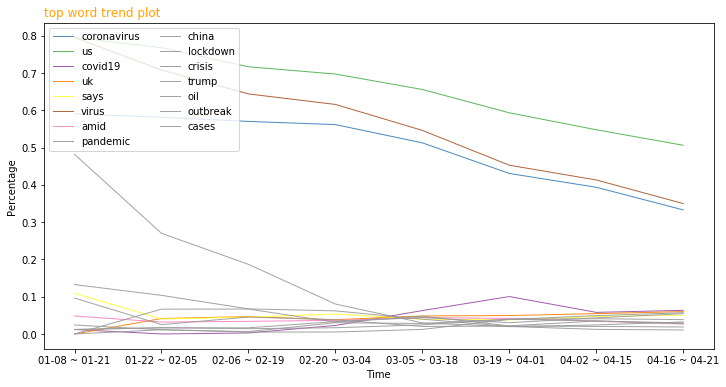

In [37]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df_token_trend.drop('date', axis=1):
    num+=1
    plt.plot(df_token_trend['date'], df_token_trend[column], marker='', 
             color=palette(num), linewidth=1, alpha=0.9, label=column)
    
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("top word trend plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

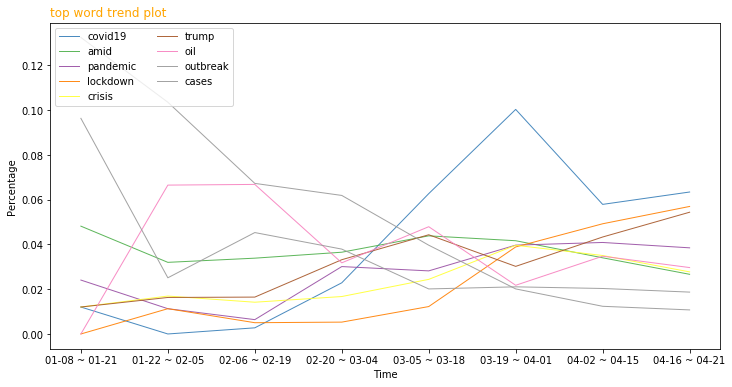

In [38]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df_token_trend.drop(['date', 'us','uk','china','virus','says','coronavirus'], axis=1):
    num+=1
    plt.plot(df_token_trend['date'], df_token_trend[column], marker='', 
             color=palette(num), linewidth=1, alpha=0.9, label=column)
    
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("top word trend plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Percentage")

#### Random thoughts

##### pie charts of categories

In [39]:
set(df['topic_area'])

{'business', 'finance', 'general', 'medical', 'science', 'tech'}

In [40]:
Counter(df['topic_area']).most_common(6)

[('general', 26240),
 ('finance', 12338),
 ('business', 10639),
 ('tech', 2601),
 ('science', 507),
 ('medical', 16)]

In [41]:
[i[0] for i in Counter(df['topic_area']).most_common(6)]

['general', 'finance', 'business', 'tech', 'science', 'medical']

In [42]:
topics_count = [i[1] for i in Counter(df['topic_area']).most_common(6)]
topics = [i[0] for i in Counter(df['topic_area']).most_common(6)]

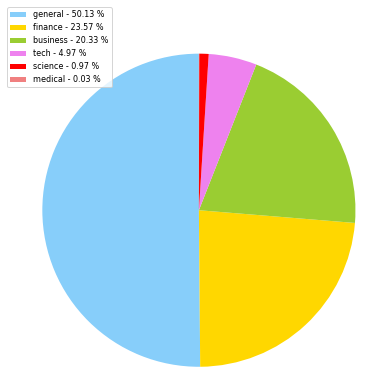

In [43]:
plt.figure(figsize = (12,6))
colors = ['lightskyblue','gold','yellowgreen','violet','red','lightcoral']
percent = [100 * i / df.shape[0] for i in topics_count]

patches, texts = plt.pie(topics_count, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(topics, percent)]


patches, labels, dummy =  zip(*sorted(zip(patches, labels, topics_count), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.), fontsize=8)